# Descriptive Analysis of the Bike Sharing Data

## Data Import

In [1]:
%matplotlib inline
import io, requests, os
import zipfile
import warnings
warnings.filterwarnings(action='ignore')

## Configuration ===
url_for_bike_download = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
local_path = 'c:\\dev\\bike\\data'

def load_and_unzip(url, dest=''):
    """
    Downloads and unpacks datasets in zip format
    """
    response = requests.get(url)
    compressed_file = io.BytesIO(response.content)
    z = zipfile.ZipFile(compressed_file)
    print ('Extracting in %s' %  dest)
    for name in z.namelist():
        if '.csv' in name:
            print ('\tunzipping %s' %name)
            z.extract(name, path=dest)

load_and_unzip(url_for_bike_download, local_path)

Extracting in c:\dev\bike\data
	unzipping day.csv
	unzipping hour.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
source = local_path + '\\' + 'hour.csv'
data = pd.read_csv(source, parse_dates=['dteday'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Descriptive Analysis

In [3]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
attributes = [x for x in list(data.columns.values) if x not in ['instant']]
num_attributes = [x for x in attributes if x not in ['dteday']]
cnt_attributes = ['casual','registered','cnt']

### Evolution of Rentals

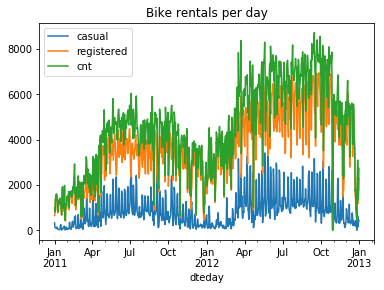

In [5]:
data.set_index('dteday')
data[['dteday'] + cnt_attributes].groupby('dteday').agg('sum').plot(title='Bike rentals per day');

In [6]:
data[['yr']+cnt_attributes].groupby(['yr']).agg('sum')

,casual,registered,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


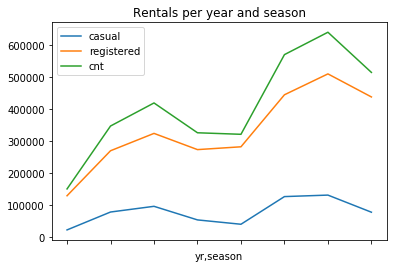

In [7]:
data[['season', 'yr']+cnt_attributes].groupby(['yr','season']).agg('sum').plot(title='Rentals per year and season');

###  Seasonality

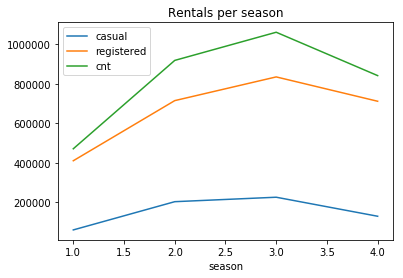

In [8]:
data[['season']+cnt_attributes].groupby('season').agg('sum').plot(title='Rentals per season');

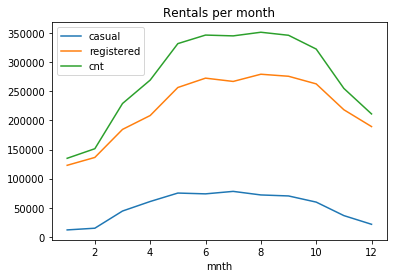

In [9]:
data[['mnth']+cnt_attributes].groupby('mnth').agg('sum').plot(title='Rentals per month');

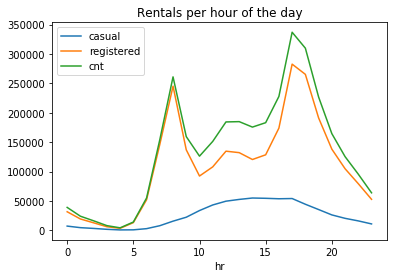

In [10]:
data[['hr']+cnt_attributes].groupby('hr').agg('sum').plot(title='Rentals per hour of the day');

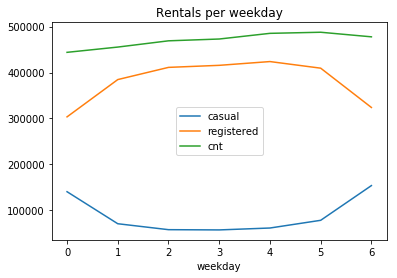

In [11]:
data[['weekday']+cnt_attributes].groupby('weekday').agg('sum').plot(title='Rentals per weekday');

###  Working day sensitivity

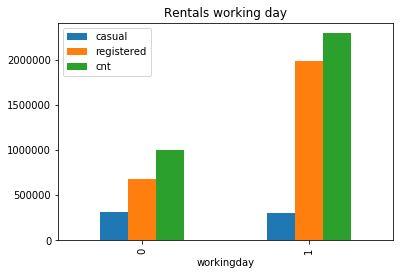

In [12]:
data[['workingday']+cnt_attributes].groupby('workingday').agg('sum').plot(title='Rentals working day', kind='bar');

In [13]:
data.holiday.sum()/data.holiday.count()

0.028770355026181024

###  Weather sensitivity

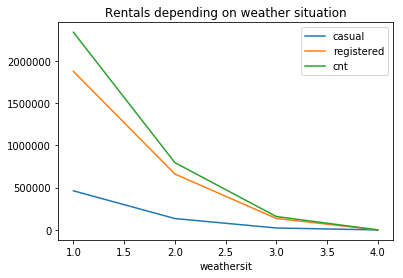

In [14]:
data[['weathersit']+cnt_attributes].groupby('weathersit').agg('sum').plot(title='Rentals depending on weather situation');

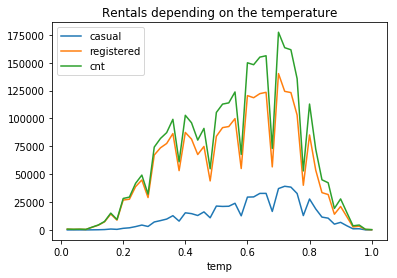

In [15]:
data[['temp']+cnt_attributes].groupby('temp').agg('sum').plot(title='Rentals depending on the temperature');

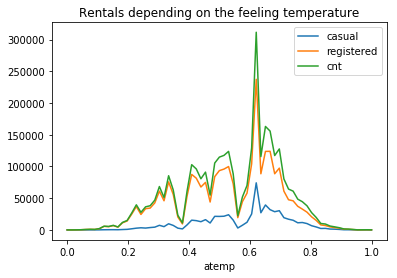

In [16]:
data[['atemp']+cnt_attributes].groupby('atemp').agg('sum').plot(title='Rentals depending on the feeling temperature');

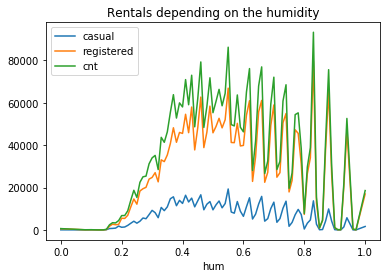

In [17]:
data[['hum']+cnt_attributes].groupby('hum').agg('sum').plot(title='Rentals depending on the humidity');

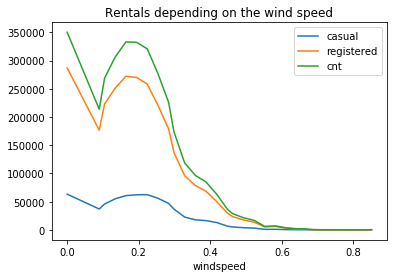

In [18]:
data[['windspeed']+cnt_attributes].groupby('windspeed').agg('sum').plot(title='Rentals depending on the wind speed');

## Univariate Distributions

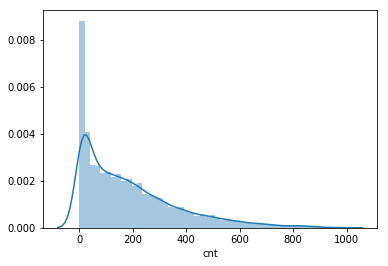

In [19]:
sns.distplot(data['cnt']);

In [20]:
data[(data.hr > 6) & (data.hr < 22)].cnt.describe()

count    10922.000000
mean       272.064182
std        179.173595
min          1.000000
25%        139.000000
50%        233.000000
75%        367.000000
max        977.000000
Name: cnt, dtype: float64